## 2D WAVE

Now lets get things complicated!!!

Our next step is to simulate a 2-dimension problem. Instead of a string there will be a membrane having a square domain $0<x<10$ and $0<y<10$
The initial displacement everywhere is given by $sinx$ $cosy$ and the initial velocity is kept 0. At all edges the membrane is pinned so it cannot move.

Let us solve this problem now.

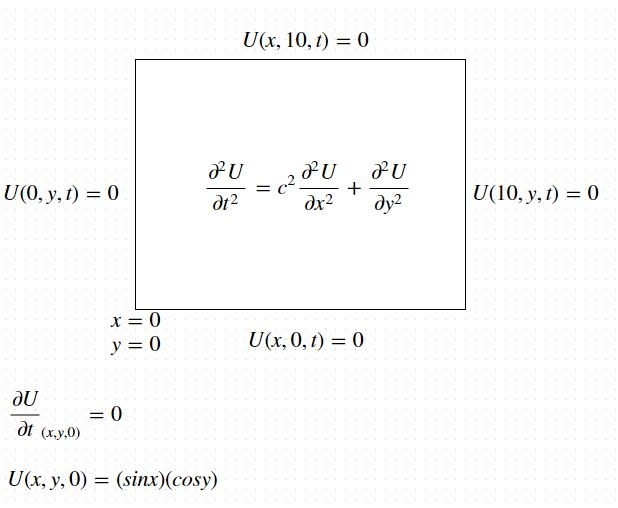

In [55]:
from IPython.display import display
from IPython.display import Image
display(Image(filename='problem2d.JPG'))

Now write down the problem in mathematical form.

Initial Conditions:  $$\frac{\partial U}{\partial t}_{\left ( x,y,0 \right )} = 0$$
                                
$$U(x,0)=(sinx)(cosy)$$


Boundary Conditions:
$$U(0,y,t) = 0$$
                                 
$$U(10,y,t) = 0$$

$$U(x,0,t) = 0$$
                                 
$$U(x,10,t) = 0$$


The Partial Differential Equation for wave in 2D is given by:

$$\frac{\partial^2 U}{\partial t^2} = c^{2}\frac{\partial^2 U}{\partial x^2}+\frac{\partial^2 U}{\partial y^2}\quad(1)$$

Discretize the partial differential equation with respect to space and time.

The 2D Wave equation with central difference in space and time both is given as:

$$\frac{U_{i,j}^{n+1}-2U_{i,j}^{n}+U_{i,j}^{n-1}}{\Delta t^{2}} =c^{2}\left \{ \right.\frac{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}}{\Delta x^{2}} + \frac{U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}{\Delta y^{2}}\left. \right \}$$


Assuming that $U_{_{i,j}^{}}^{n}$ and $U_{_{i,j}^{}}^{n-1}$ are already computed then the only unknown parameter is $U_{_{i,j}^{}}^{n+1}$

So solving the descritized 1D wave equation to find out the unknown parameter:

$${U_{i,j}^{n+1}=-U_{i,j}^{n-1}}+2U_{i,j}^{n} +c^{2}\frac{\Delta t^{2}}{\Delta x^{2}}\left \{ \right.{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}}\left. \right \} + c^{2}\frac{\Delta t^{2}}{\Delta y^{2}}\left \{ \right.{U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}\left. \right \}$$

Now, $\Delta x^{2}$ is equal to $\Delta y^{2}$ as $x=y=10$. Let us denote $\Delta x^{2} = \Delta y^{2} =\Delta h^{2}$

$${U_{i,j}^{n+1}=-U_{i,j}^{n-1}}+2U_{i,j}^{n} +c^{2}\frac{\Delta t^{2}}{\Delta h^{2}}\left \{ \right.{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}\left. \right \}$$

$${U_{i,j}^{n+1}=-U_{i,j}^{n-1}}+2U_{i,j}^{n} +C^{2}\left \{ \right.{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}\left. \right \}\quad(2)$$

Where $$C^{2}=c^{2}\frac{\Delta t^{2}}{\Delta{}h ^{2}}$$

Here, again we need to create a special formula for $U^{n+1}$ when we run the 1st iteration, which is for n=0 as $U^{n-1} = U^{-1}$ falls outside our meshgrid of $0<x<10$ and $0<y<10$

We will tackle this problem by implementing the initial condition. So, descritize the derivative in the initial condition by finite difference method of central difference type.

$$\frac{\partial U}{\partial t} = \frac{U_{_{i,j}^{}}^{n+1}-U_{_{i,j}^{}}^{n-1}}{2\Delta t}=0$$

$$U_{_{i,j}^{}}^{n+1}-U_{_{i,j}^{}}^{n-1}=0$$

$$U_{_{i,j}^{}}^{n+1}=U_{_{i,j}^{}}^{n-1}$$


The other initial condition is given by : $$U_{i,j} = (sin x_{i})(cos y_{j})$$

Lets put the above relation in equation (2) and solve.

$$U_{i,j}^{n+1}=U_{i,j}^{n} +\frac{C^{2}}{2}\left \{ \right.{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}\left. \right \}$$

$$U_{i,j}^{n+1}=U_{i,j}^{n} +\frac{C^{2}}{2}\left \{ \right.{U_{i+1,j}^{n+1}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}+U_{i,j-1}^{n-1}-4U_{i,j}^{n}}\left. \right \}\quad (3)$$

So equation (3) will be used to solve the 1st iteration and the rest of the iterations will be solved by the following equation (2):

$${U_{i,j}^{n+1}=-U_{i,j}^{n-1}}+2U_{i,j}^{n} +C^{2}\left \{ \right.{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}\left. \right \}$$

Coding time!!!!!

In [56]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
from mpl_toolkits.mplot3d import Axes3D
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Insert all data of the problem...


In [58]:
L = 10.
H = 10.
nt = 100
nx = 100
ny = 100
c= 3

dx = 0.1
dy = 0.1
dh = dx
dt = 0.1
C2 = ((c**2) * ((dt/dh)**2))
Ui = numpy.ones((ny, nx))                    #n+1
Un = Ui.copy()                               #n
Unx = Un.copy()                              #n-1
x= numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

Set the initial condition...
                                
$$U_{i} = (sin x_{i})(cos y_{j})$$

In [59]:
def initial_condition(Ui,L, x, y, nx,ny):
    for i in range(0,nx):
        for j in range(0,ny):
            Ui[i,j] = (numpy.sin(x[i]))*(numpy.cos(y[j]))
    return Ui

Next we will solve the descritized function....

$${U_{i,j}^{n+1}=-U_{i,j}^{n-1}}+2U_{i,j}^{n} +C^{2}\left \{ \right.{U_{i+1,j}^{n+1}-2U_{i,j}^{n}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}-2U_{i,j}^{n}+U_{i,j-1}^{n-1}}\left. \right \}$$

In [60]:
def ftcs(Uarray, nt, C2, Un, Unx):
      
    for n in range(nt):   
        Uarray[1:-1, 1:-1] = -Unx[1:-1, 1:-1] + 2*Un[1:-1, 1:-1]  +\
                              (C2) *(Un[2:, 1:-1]+ Un[0:-2,1:-1]+\
                               Un[1:-1,2:] + Un[1:-1,0:-2] - 4*Un[1:-1,1:-1])
    
    #Applying Boundary Conditions
    Uarray[0,:] = 0
    Uarray[nt-1, :] = 0
    Uarray[:,0] = 0
    Uarray[:, nt-1] = 0

    return Uarray
    Unx[:], Un[:] = Un, U

Implementing the special condition for the 1st iteration......

$$U_{i,j}^{n+1}=U_{i,j}^{n} +\frac{C^{2}}{2}\left \{ \right.{U_{i+1,j}^{n+1}+U_{i-1,j}^{n-1}} + {U_{i,j+1}^{n+1}+U_{i,j-1}^{n-1}-4U_{i,j}^{n}}\left. \right \}$$

In [61]:
def special_condition(C2, Uarray, Un):
    for n in range (nt):
        Uarray[1:-1,1:-1] = Un[1:-1, 1:-1] + (1/2) * C2 * (Un[2:,1:-1] +\
                            Un[0:-2,1:-1]+ Un[1:-1,2:] + Un[1:-1,0:-2] -\
                                                           4*Un[1:-1,1:-1])
    return Uarray

In [62]:
#calling the inital condition
xsd = initial_condition(Ui, L, x, y, nx,ny)

In [63]:
#callinf the condition used for 1st iteration
xsd1 = special_condition(C2, xsd.copy(), xsd.copy())

In [64]:
#callinf the main function
xsd2 = ftcs(xsd1.copy(), nt, C2, xsd1.copy(), xsd1.copy())

In [65]:
#printing the array
xsd2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.08191503,  0.08066029, ..., -0.07666718,
        -0.07324931,  0.        ],
       [ 0.        ,  0.16299499,  0.16049829, ..., -0.15255278,
        -0.14575189,  0.        ],
       ..., 
       [ 0.        , -0.29617796, -0.2916412 , ...,  0.27720343,
         0.26484553,  0.        ],
       [ 0.        , -0.37094467, -0.36526267, ...,  0.34718024,
         0.33170274,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Let's setup an array for time aswell.....



In [66]:
time = numpy.linspace(0, nt, nx)

In [67]:
#printing array of time
time

array([   0.        ,    1.01010101,    2.02020202,    3.03030303,
          4.04040404,    5.05050505,    6.06060606,    7.07070707,
          8.08080808,    9.09090909,   10.1010101 ,   11.11111111,
         12.12121212,   13.13131313,   14.14141414,   15.15151515,
         16.16161616,   17.17171717,   18.18181818,   19.19191919,
         20.2020202 ,   21.21212121,   22.22222222,   23.23232323,
         24.24242424,   25.25252525,   26.26262626,   27.27272727,
         28.28282828,   29.29292929,   30.3030303 ,   31.31313131,
         32.32323232,   33.33333333,   34.34343434,   35.35353535,
         36.36363636,   37.37373737,   38.38383838,   39.39393939,
         40.4040404 ,   41.41414141,   42.42424242,   43.43434343,
         44.44444444,   45.45454545,   46.46464646,   47.47474747,
         48.48484848,   49.49494949,   50.50505051,   51.51515152,
         52.52525253,   53.53535354,   54.54545455,   55.55555556,
         56.56565657,   57.57575758,   58.58585859,   59.59595

Now let us check the wave that has been created by plotting a graph...

In [68]:
def plot_3D(x, y, p):
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

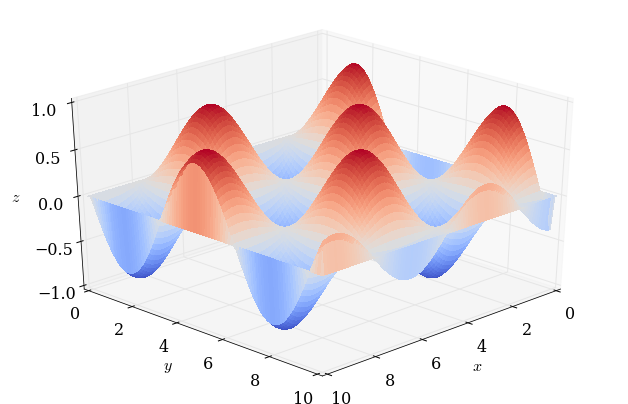

In [69]:
plot_3D(x,y,xsd2)

## REFERENCES

1.   Barba, Lorena A., et al. "MEA 6286 Practical Numerical Methods with Python,"  Jupyter nbviewer notebooks, The George Washington University, 2015.
http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/tree/master/lessons/

2.   Haberman, Richard. Elementary Applied Partial Differential Equations.

3.   Sarkar, Kaushik. "APSC 6213 Analytical Methdods in Engineering III," class notes.